# Do more profitable movies also have higher ratings?
##  Higher Rated Movies versus Profit <br>


In [79]:
# necessary imports
import os  # for path/directory 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv
from importlib import reload
import helper_functions as hf
%matplotlib inline

In [80]:
reload(hf)

<module 'helper_functions' from '/Users/shirlwilliams/flatiron/Project_Module01/dsc-mod-1-project-v2-1-online-ds-ft-120919/helper_functions.py'>

In [81]:
conn = sqlite3.Connection("movies_db.sqlite")

In [82]:
# View interested tables
df1 = hf.load_table(conn, "tmdb_movies")
df2 = hf.load_table(conn, "top_budget_gross_diff_movies")

In [83]:
print(df1.head())
df2.head()

   index            genre_ids     id original_language  \
0      0      [12, 14, 10751]  12444                en   
1      1  [14, 12, 16, 10751]  10191                en   
2      2        [12, 28, 878]  10138                en   
3      3      [16, 35, 10751]    862                en   
4      4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your D

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [87]:
query = '''SELECT movie, vote_average, budget_gross_diff AS profit
            FROM tmdb_movies
            JOIN top_budget_gross_diff_movies
            ON movie = title
            ORDER BY profit DESC
            '''
profit_rating_movies_df = pd.read_sql(query, conn)
profit_rating_movies_df.head()

,movie,vote_average,profit
0,Avatar,7.4,2351345279
1,Avatar,7.4,2351345279
2,Avatar,7.4,2351345279
3,Avengers: Infinity War,8.3,1748134200
4,Avengers: Infinity War,8.3,1748134200


In [88]:
profit_rating_movies_df = profit_rating_movies_df.drop_duplicates()
profit_rating_movies_df.head()

,movie,vote_average,profit
0,Avatar,7.4,2351345279
3,Avengers: Infinity War,8.3,1748134200
6,Jurassic World,6.6,1433854864
9,Furious 7,7.3,1328722794
12,The Avengers,7.6,1292935897


In [89]:
profit_rating_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 7152
Data columns (total 3 columns):
movie           2198 non-null object
vote_average    2198 non-null float64
profit          2198 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 68.7+ KB


In [90]:
profit_rating_movies_df.describe()

,vote_average,profit
count,2198.000000,2.198000e+03
mean,6.157598,8.102941e+07
std,1.197689,1.839912e+08
min,0.000000,-1.104502e+08
25%,5.600000,-1.900346e+06
50%,6.200000,1.361892e+07
75%,6.900000,7.400879e+07
max,10.000000,2.351345e+09


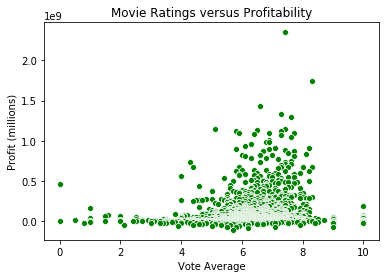

In [91]:
# Scatterplot of movies by popularity vs profitability
g = sns.scatterplot(x='vote_average', y='profit', data=profit_rating_movies_df, color='green')
plt.xlabel('Vote Average')
plt.ylabel('Profit (millions)')
plt.title('Movie Ratings versus Profitability')
plt.show()


In [92]:
top_profit_rating_movies = profit_rating_movies_df[:50]
top_profit_rating_movies.head()

,movie,vote_average,profit
0,Avatar,7.4,2351345279
3,Avengers: Infinity War,8.3,1748134200
6,Jurassic World,6.6,1433854864
9,Furious 7,7.3,1328722794
12,The Avengers,7.6,1292935897


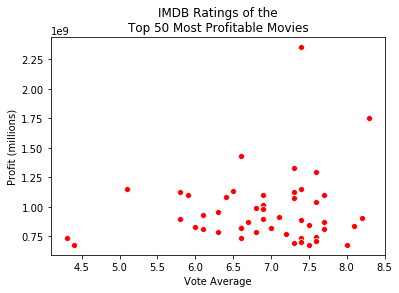

In [93]:
# Scatterplot of movies by popularity vs most profitabile
g = sns.scatterplot(x='vote_average', y='profit', data=top_profit_rating_movies, color='red')
plt.xlabel('Vote Average')
plt.ylabel('Profit (millions)')
plt.title('IMDB Ratings of the\nTop 50 Most Profitable Movies')
plt.show()

In [94]:
top_rated_df = profit_rating_movies_df.sort_values(by='vote_average', ascending=False)[:200]
top_rated_df.head()

,movie,vote_average,profit
1734,Book Club,10.0,81113683
6360,Redemption,10.0,-9406527
6267,A Better Life,10.0,-8115749
5973,Grace,10.0,-4991703
2436,Black Mass,10.0,45837872


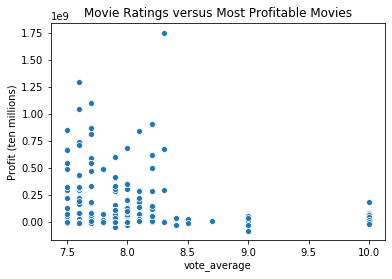

In [62]:
# Scatterplot of movies by most populare vs  profitability
g = sns.scatterplot(x='vote_average', y='profit', data=top_rated_df)
plt.ylabel('Profit (ten millions)')
plt.title('Movie Ratings versus Most Profitable Movies')
plt.show()